Attempting to download data from:
https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv

Data downloaded successfully.

Data Sample (first 5 rows):
                              time   latitude   longitude    depth   mag  \
0 2025-10-26 16:55:56.960000+00:00  38.838165 -122.789833    1.610  1.11   
1 2025-10-26 16:42:19.439000+00:00  62.947900 -151.031900  106.500  1.50   
2 2025-10-26 16:30:09.132000+00:00  58.207500 -154.882400   63.000  0.80   
3 2025-10-26 16:23:55.718000+00:00  51.871000  158.786000   69.447  4.60   
4 2025-10-26 16:18:56.061000+00:00  -6.790700  121.878700   10.000  4.70   

  magType   nst    gap      dmin   rms  ...  \
0      md   8.0  124.0  0.000467  0.04  ...   
1      ml   NaN    NaN       NaN  0.38  ...   
2      ml   NaN    NaN       NaN  0.74  ...   
3      mb  23.0  170.0  1.157000  0.74  ...   
4      mb  26.0   85.0  2.055000  0.79  ...   

                               place        type horizontalError depthError  \
0              

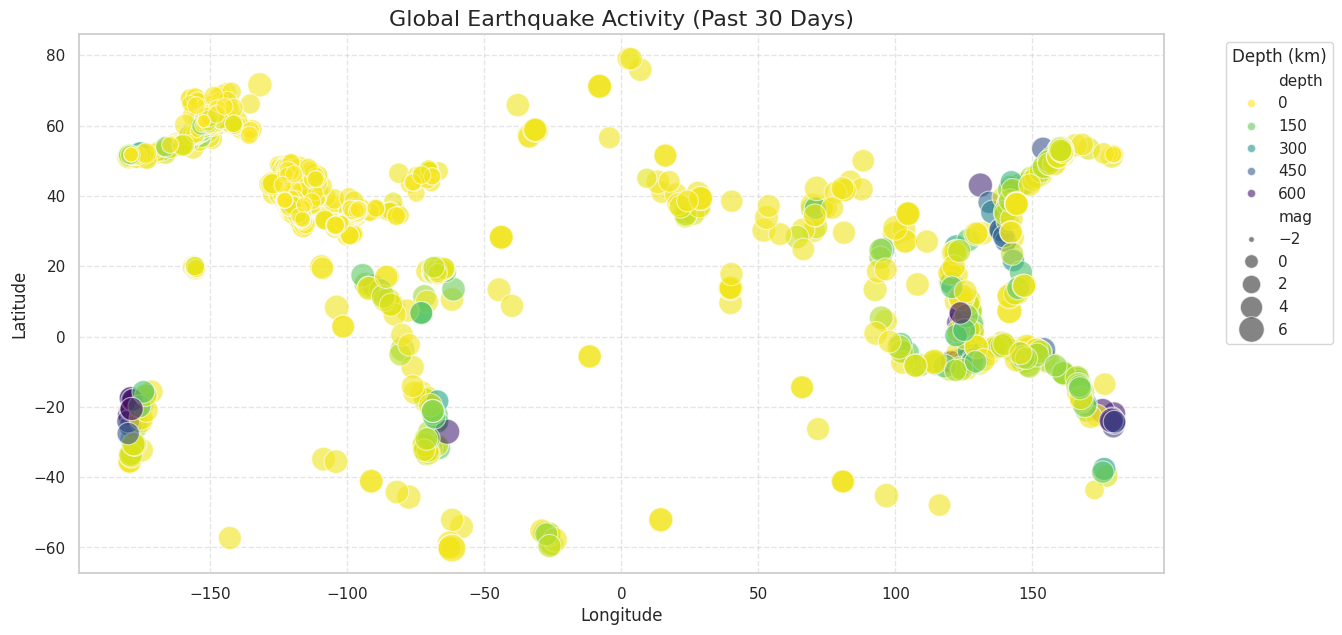

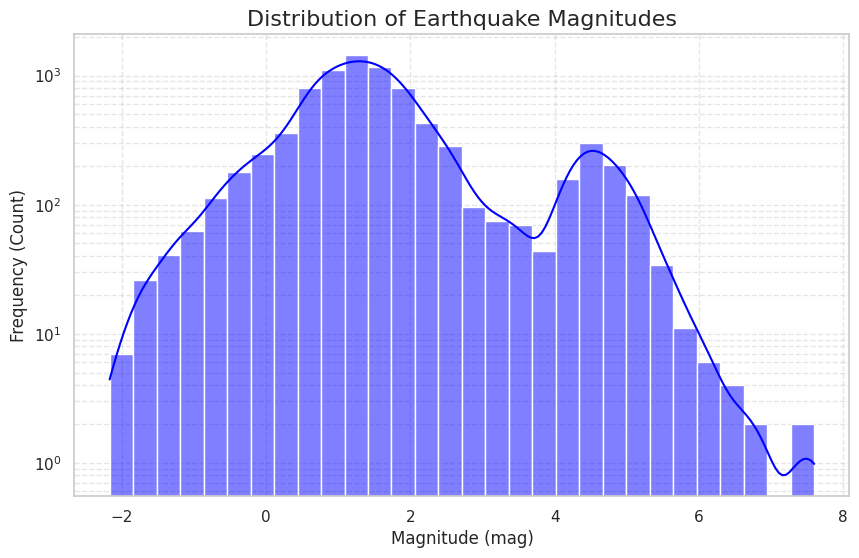

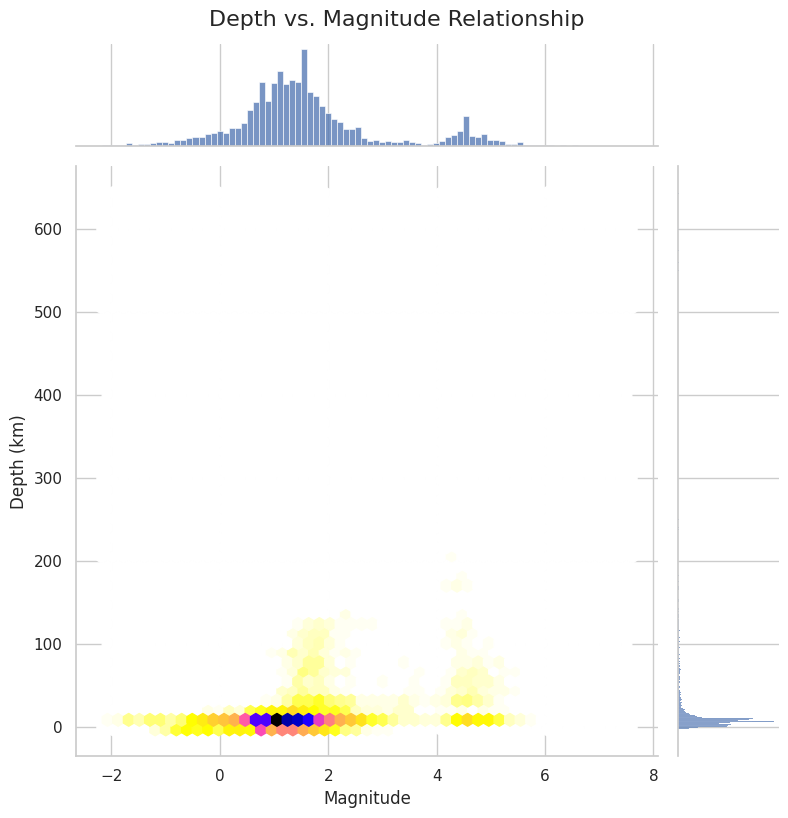

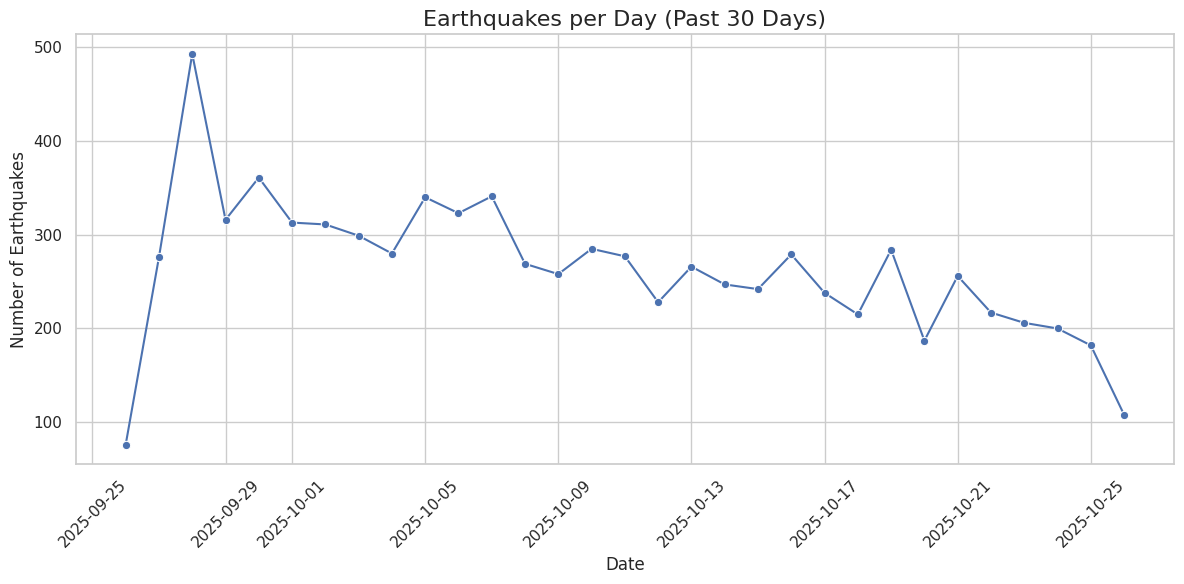

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import urllib.error

# This is a live data feed from the USGS.
# It contains all earthquakes M1.0+ for the past 30 days.
DATA_URL = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"

def load_data(url):
    """
    Loads earthquake data from the USGS live feed.
    """
    try:
        print(f"Attempting to download data from:\n{url}\n")
        df = pd.read_csv(url)
        print("Data downloaded successfully.")

        # --- CRITICAL Data Preparation ---
        # Convert the 'time' column from a string to a datetime object
        df['time'] = pd.to_datetime(df['time'])

        # Create a 'day' column for the time-series plot
        df['day'] = df['time'].dt.date

        # Invert depth so positive values are "deeper" (optional, but can be intuitive)
        # df['depth'] = -df['depth']

        print("\nData Sample (first 5 rows):")
        print(df.head())
        print(f"\nLoaded {len(df)} earthquake events.")
        return df

    except urllib.error.URLError as e:
        print(f"Error: Could not download data. Check connection or URL. {e}")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

def plot_geo_map(df):
    """
    Plot 1: The "Big" Geo-Plot.
    Plots longitude vs. latitude to map the earthquakes.
    Size = Magnitude
    Color = Depth
    """
    print("Generating Plot 1: Global Earthquake Map...")
    plt.figure(figsize=(14, 7))

    #
    # This scatter plot will visually recreate the "Ring of Fire"
    sns.scatterplot(
        data=df,
        x='longitude',
        y='latitude',
        hue='depth',       # Color by depth
        size='mag',        # Size by magnitude
        palette='viridis_r', # 'r' reverses it: yellow=shallow, purple=deep
        sizes=(10, 400),   # Range of bubble sizes
        alpha=0.6          # Make points semi-transparent
    )

    plt.title('Global Earthquake Activity (Past 30 Days)', fontsize=16)
    plt.xlabel('Longitude', fontsize=12)
    plt.ylabel('Latitude', fontsize=12)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Depth (km)')
    plt.grid(True, linestyle='--', alpha=0.5)

def plot_magnitude_distribution(df):
    """
    Plot 2: Magnitude Distribution (Histogram).
    Shows the frequency of different earthquake magnitudes.
    """
    print("Generating Plot 2: Magnitude Distribution...")
    plt.figure(figsize=(10, 6))

    sns.histplot(df['mag'], kde=True, bins=30, color='blue')

    plt.title('Distribution of Earthquake Magnitudes', fontsize=16)
    plt.xlabel('Magnitude (mag)', fontsize=12)
    plt.ylabel('Frequency (Count)', fontsize=12)
    plt.yscale('log') # Use log scale as small quakes are much more common
    plt.grid(True, which="both", ls="--", alpha=0.5)

def plot_depth_magnitude(df):
    """
    Plot 3: Depth vs. Magnitude (Joint Plot).
    Shows the relationship between magnitude and depth using a hex-density plot.
    """
    print("Generating Plot 3: Depth vs. Magnitude...")

    # A jointplot shows the relationship AND the distributions on the axes
    # 'kind=hex' is great for large datasets to show density
    g = sns.jointplot(
        data=df,
        x='mag',
        y='depth',
        kind='hex', # Use 'hex' for density
        cmap='gnuplot2_r',
        height=8
    )
    g.fig.suptitle('Depth vs. Magnitude Relationship', y=1.02, fontsize=16)
    g.set_axis_labels('Magnitude', 'Depth (km)', fontsize=12)

def plot_recent_activity(df):
    """
    Plot 4: Recent Activity (Time Series).
    Shows the number of earthquakes per day over the past 30 days.
    """
    print("Generating Plot 4: Daily Earthquake Count...")

    # Group by the 'day' column we made and count the events
    daily_counts = df.groupby('day').size().reset_index(name='count')

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=daily_counts, x='day', y='count', marker='o')

    plt.title('Earthquakes per Day (Past 30 Days)', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Number of Earthquakes', fontsize=12)
    plt.xticks(rotation=45) # Rotate date labels
    plt.grid(True)

def main():
    """
    Main function to run the analysis.
    """
    sns.set_theme(style="whitegrid")

    df = load_data(DATA_URL)

    if df is not None:
        # --- Create all plots ---
        plot_geo_map(df)
        plot_magnitude_distribution(df)
        plot_depth_magnitude(df)
        plot_recent_activity(df)

        # --- Show all plots ---
        print("\nDisplaying all plots... Close the plot windows to exit.")
        plt.tight_layout() # Adjust plots to prevent overlap
        plt.show()
    else:
        print("Could not analyze data due to loading error.")

if __name__ == "__main__":
    main()
